In [5]:
import numpy as np
import matplotlib.pyplot as plt

# null space
from scipy.linalg import null_space

import sympy as sym


# NOTE: these lines define global figure properties used for publication.
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14}) # set global font size

10 - 1

In [6]:
numcourses = [13,4,12,3,14,13,12,9,11,7,13,11,9,2,5,7,10,0,9,7]
happiness  = [70,25,54,21,80,68,84,62,57,40,60,64,45,38,51,52,58,21,75,70]

In [7]:
X = np.array(numcourses,ndmin = 2).T

X_leftinv = np.linalg.inv(X.T@X)@X.T #왼쪽 역행렬

beta = X_leftinv@happiness
beta

array([5.92402926])

In [8]:
pred_happiness = X@beta

In [9]:
res = happiness - pred_happiness

['AppleGothic']


/Users/marklee/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


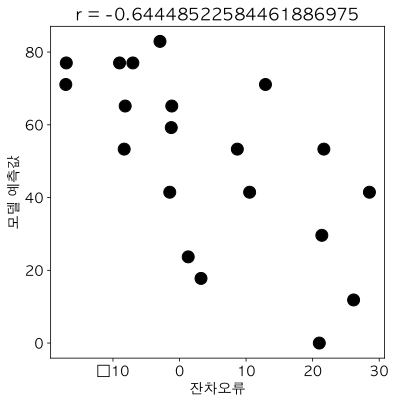

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'AppleGothic'
print(plt.rcParams['font.family'])

plt.rcParams.update({'font.family' : 'AppleGothic', #한글 폰트
                   'figure.dpi' : '120', #해상도
                   'figure.figsize' : [6.5, 6]}) # 가로 세로 크기

plt.figure(figsize=(6,6))
plt.plot(res,pred_happiness,'ko',markersize=12)
plt.xlabel('잔차오류')
plt.ylabel('모델 예측값')
plt.title(f'r = {np.corrcoef(pred_happiness,res)[0,1]:.20f}')
plt.show()

In [11]:
print('내적: ' + str(np.dot(pred_happiness,res)) )
print('상관계수: ' + str(np.corrcoef(pred_happiness,res)[0,1]))
print(' ')

내적: 5.4569682106375694e-12
상관계수: -0.6444852258446189
 


10 - 2

In [12]:
null = null_space(X.T)
nullaug = np.hstack( (null,res.reshape(-1,1)) )

print(f'dim(  N(X)    ) = {np.linalg.matrix_rank(null)}') #영공간의 차원
print(f'dim( [N(X)|r] ) = {np.linalg.matrix_rank(nullaug)}') #영공간에 잔차벡터(전체 부분공간과 직교)를 추가한 차원

# 잔차벡터가 영공간에 속한다는 것을 증명한 것이다.

dim(  N(X)    ) = 19
dim( [N(X)|r] ) = 19


10 - 3

In [13]:
X = np.hstack((np.ones((20,1)),X))
beta1 = np.linalg.inv(X.T@X) @ X.T @ happiness

Q,R = np.linalg.qr(X)
beta2 = np.linalg.inv(R) @ (Q.T@happiness)

tmp = (Q.T@happiness).reshape(-1,1)
Raug = np.hstack((R,tmp))
Raug_r = sym.Matrix(Raug).rref()[0]  #RREF, 즉 행사다리꼴을 추출
beta3 = np.array(Raug_r[:,-1]) 

print('왼쪽 역으로 구한 베타: ')
print(np.round(beta1,3)), print(' ')

print('inv(R)을 이용해 QR로 구한 베타: ')
print(np.round(beta2,3)), print(' ')

print('역치환을 이용해 QR로 구한 베타: ')
print(np.round(np.array(beta3.T).astype(float),3))

왼쪽 역으로 구한 베타: 
[23.13   3.698]
 
inv(R)을 이용해 QR로 구한 베타: 
[23.13   3.698]
 
역치환을 이용해 QR로 구한 베타: 
[[23.13   3.698]]


In [14]:
print('행렬 R:')
print(np.round(R,3)) # 상삼각행렬

print(' ')
print("행렬 R|Q'y:")
print(np.round(Raug,3))

print(' ')
print("행렬 RREF(R|Q'y):")
print(np.round(np.array(Raug_r).astype(float),3)) 

행렬 R:
[[ -4.472 -38.237]
 [  0.     17.747]]
 
행렬 R|Q'y:
[[  -4.472  -38.237 -244.849]
 [   0.      17.747   65.631]]
 
행렬 RREF(R|Q'y):
[[ 1.     0.    23.13 ]
 [ 0.     1.     3.698]]


10 - 4

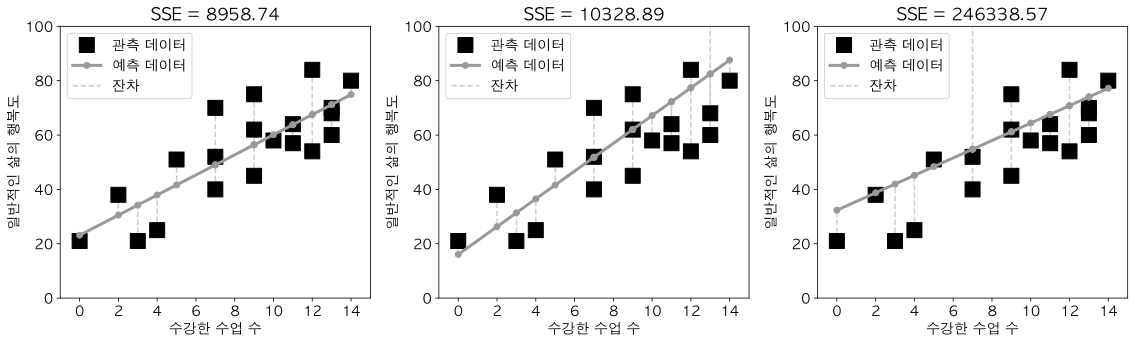

In [15]:
happiness1  = [170,25,54,21,80,68,84,62,57,40,60,64,45,38,51,52,58,21,75,70]
happiness2  = [70,25,54,21,80,68,84,62,57,40,60,64,45,38,51,52,58,21,75,170]

X_leftinv = np.linalg.inv(X.T@X) @ X.T

_,axs = plt.subplots(1,3,figsize=(16,5))

for axi,y in zip(axs,[happiness,happiness1,happiness2]):

  # compute the best-fit parameters
  beta = X_leftinv @ y

  # predicted data
  pred_happiness = X@beta


  # plot the data and predicted values
  axi.plot(numcourses,y,'ks',markersize=15)
  axi.plot(numcourses,pred_happiness,'o-',color=[.6,.6,.6],linewidth=3,markersize=6)

  # plot the residuals (errors)
  for n,y,yHat in zip(numcourses,y,pred_happiness):
    axi.plot([n,n],[y,yHat],'--',color=[.8,.8,.8],zorder=-10)

  # make the plot look nicer
  axi.set(xlabel='수강한 수업 수',ylabel='일반적인 삶의 행복도',
          xlim=[-1,15],ylim=[0,100],xticks=range(0,15,2))
  axi.legend(['관측 데이터','예측 데이터','잔차'])
  axi.set_title(f'SSE = {np.sum((pred_happiness-y)**2):.2f}')
  


plt.tight_layout()
plt.show()

10 - 5

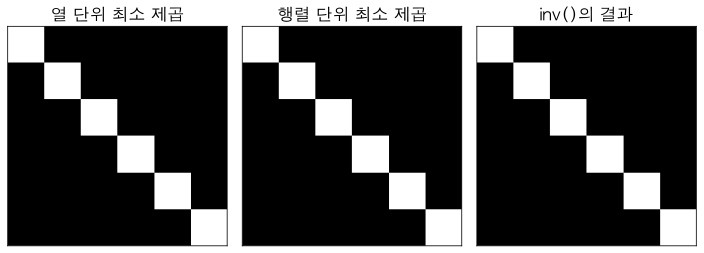

In [16]:
n = 6
X = np.random.randn(n,n)
Y = np.eye(n)

Xinv = np.zeros_like(X)

for i in range(n):
    Xinv[:,i] = np.linalg.inv(X.T@X) @X.T @Y[:,i]
    
Xinv1 = np.linalg.inv(X.T@X) @ X.T @ Y #왼쪽 역행렬 방법


Xinv2 = np.linalg.inv(X)

_,axs = plt.subplots(1,3,figsize=(10,6))


axs[0].imshow( Xinv@X ,cmap='gray')
axs[0].set_title('열 단위 최소 제곱')

# matrix-wise least-squares
axs[1].imshow( Xinv1@X ,cmap='gray' )
axs[1].set_title('행렬 단위 최소 제곱')

# inv()
axs[2].imshow( Xinv2@X ,cmap='gray' )
axs[2].set_title('inv()의 결과')


for a in axs: a.set(xticks=[],yticks=[])

plt.tight_layout()
plt.show()

11 - 1

In [17]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00560/SeoulBikeData.csv"
data = pd.read_csv(url,sep=',',encoding='unicode_escape')

data.replace(['Spring','Summer', 'Autumn','Winter'],[1,1,0,0], inplace=True)
data

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0,No Holiday,Yes


In [18]:
desmat = data[['Rainfall(mm)','Seasons']].to_numpy()
desmat = np.append(desmat,np.ones((desmat.shape[0],1)),axis=1)
y = data[['Rented Bike Count']].to_numpy()

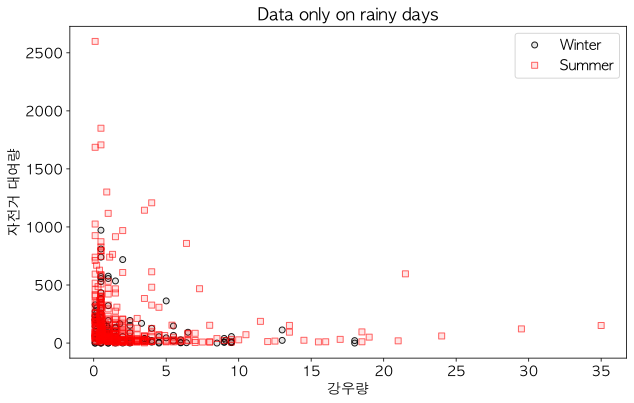

In [19]:
desmat_norain = desmat[desmat[:,0]>0,:]
y_norain = y[desmat[:,0]>0,:]

# plot the data
plt.figure(figsize=(10,6))

# separately for autumn/winter and spring/summer
plt.plot(desmat_norain[desmat_norain[:,1]==0,0],y_norain[desmat_norain[:,1]==0],'o',
         markerfacecolor=(0,0,0,.1),markeredgecolor=(0,0,0,.9),label='Winter')
plt.plot(desmat_norain[desmat_norain[:,1]==1,0],y_norain[desmat_norain[:,1]==1],'s',
         markerfacecolor=(1,0,0,.1),markeredgecolor=(1,0,0,.6),label='Summer')

plt.xlabel('강우량')
plt.ylabel('자전거 대여량')
plt.title('Data only on rainy days')
plt.legend()
plt.show()

/Users/marklee/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


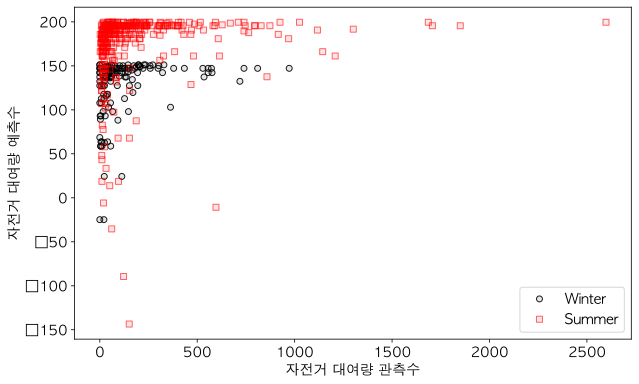

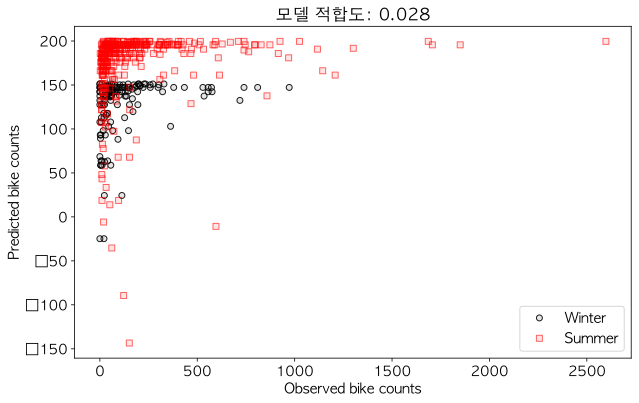

In [20]:
# run the regression (using np's least-squares) 최소제곱법 이용
beta_norain = np.linalg.lstsq(desmat_norain,y_norain,rcond=None)


# predicted data
yHat_norain = desmat_norain @ beta_norain[0]

# model fit to data (R^2)
modelfit = np.corrcoef(y_norain.T,yHat_norain.T)[0,1]**2



## plot some results.
plt.figure(figsize=(10,6))
plt.plot(y_norain[desmat_norain[:,1]==0],yHat_norain[desmat_norain[:,1]==0],'o',
         markerfacecolor=(0,0,0,.1),markeredgecolor=(0,0,0,.9),label='Winter')
plt.plot(y_norain[desmat_norain[:,1]==1],yHat_norain[desmat_norain[:,1]==1],'s',
         markerfacecolor=(1,0,0,.1),markeredgecolor=(1,0,0,.6),label='Summer')

plt.legend()
plt.xlabel('자전거 대여량 관측수')
plt.ylabel('자전거 대여량 예측수')

# run the regression (using np's least-squares)
beta_norain = np.linalg.lstsq(desmat_norain,y_norain,rcond=None)


# predicted data
yHat_norain = desmat_norain @ beta_norain[0]

# model fit to data (R^2)
modelfit = np.corrcoef(y_norain.T,yHat_norain.T)[0,1]**2



## plot some results.
plt.figure(figsize=(10,6))
plt.plot(y_norain[desmat_norain[:,1]==0],yHat_norain[desmat_norain[:,1]==0],'o',
         markerfacecolor=(0,0,0,.1),markeredgecolor=(0,0,0,.9),label='Winter')
plt.plot(y_norain[desmat_norain[:,1]==1],yHat_norain[desmat_norain[:,1]==1],'s',
         markerfacecolor=(1,0,0,.1),markeredgecolor=(1,0,0,.6),label='Summer')

plt.legend()
plt.xlabel('Observed bike counts')
plt.ylabel('Predicted bike counts')
plt.title(f'모델 적합도: {modelfit:.3f}')
plt.show()

11 - 2

/Users/marklee/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


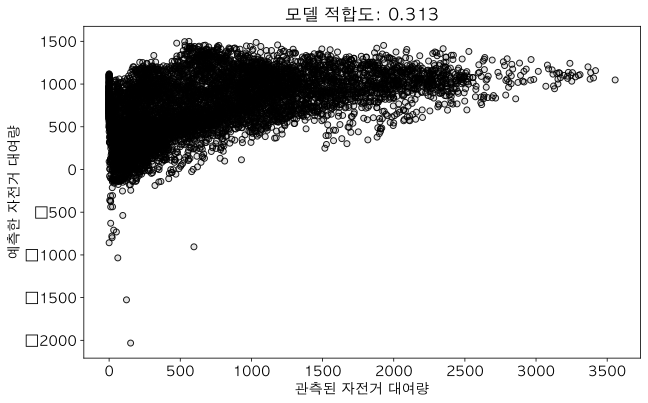

In [21]:
desmat = data[['Rainfall(mm)','Temperature(°C)']].to_numpy() #계절 대신 기온을 설계행렬로
desmat = np.append(desmat,np.ones((desmat.shape[0],1)),axis=1)

beta = np.linalg.lstsq(desmat,y,rcond=None)
yHat = desmat@beta[0]

# model fit to data (R^2)
modelfit = np.corrcoef(y.T,yHat.T)[0,1]**2

# and plot
plt.figure(figsize=(10,6))
plt.plot(y,yHat,'o',markerfacecolor=(0,0,0,.1),markeredgecolor=(0,0,0,.9))
plt.xlabel('관측된 자전거 대여량')
plt.ylabel('예측한 자전거 대여량')
plt.title(f'모델 적합도: {modelfit:.3f}')
plt.show()

11 - 3 다중공선성 문제

In [23]:
# some random linear combination
lincombo = 4*desmat[:,0] + .4*desmat[:,1]

# Create a design matrix
desmatM = data[['Rainfall(mm)','Temperature(°C)']].to_numpy()
desmatM = np.append(desmatM,np.ones((desmatM.shape[0],1)),axis=1)

# augmented design matrix
desmatM = np.append(desmatM,lincombo.reshape(-1,1),axis=1)

# size and rank of the design matrix
print(f'Design matrix size: {desmatM.shape}')
print(f'Design matrix rank: {np.linalg.matrix_rank(desmatM)}')

pd.DataFrame(desmatM,columns=['Rain','Temp','Int','Combo']).corr()

Design matrix size: (8760, 4)
Design matrix rank: 3


,Rain,Temp,Int,Combo
Rain,1.000000,0.050282,NaN,0.705704
Temp,0.050282,1.000000,NaN,0.743094
Int,NaN,NaN,NaN,NaN
Combo,0.705704,0.743094,NaN,1.000000


In [24]:
#왼쪽 역행렬 사용
X_leftinv = np.linalg.inv(desmatM.T@desmatM) @ desmatM.T

beta1 = X_leftinv @ y
yHat  = desmatM@beta1

modelfit1 = np.corrcoef(y.T,yHat.T)[0,1]**2
print(modelfit1)

0.10306927861230561


In [25]:
#최소제곱법 사용
beta2 = np.linalg.lstsq(desmatM,y,rcond=None)
yHat  = desmatM@beta2[0]

modelfit2 = np.corrcoef(y.T,yHat.T)[0,1]**2
print(modelfit2)

0.3126481542486898


In [28]:
import statsmodels.api as sm

#statsmodels 사용
desmat_df = pd.DataFrame(desmatM)
obsdata_df = data['Rented Bike Count']

# create and fit the model
desmat_df = sm.add_constant(desmat_df)
model = sm.OLS(obsdata_df,desmat_df).fit()


beta3 = model.params.values
modelfit3 = model.rsquared

In [29]:
print('데이터에 모델 적합:')
print(f'  왼쪽-역: {modelfit1:.4f}')
print(f'  NumPy lstsqr   : {modelfit2:.4f}')
print(f'  statsmodels : {modelfit3:.4f}')

print(' ')
print('베타 계수:')
print(f'  왼쪽-역: {np.round(beta1.T,3)}')
print(f'  NumPy lstsqr   : {np.round(beta2[0].T,3)}')
print(f'  statsmodels : {np.round(beta3.T,3)}')

데이터에 모델 적합:
  왼쪽-역: 0.1031
  NumPy lstsqr   : 0.3126
  statsmodels : 0.3126
 
베타 계수:
  왼쪽-역: [[-1.67070e+03 -1.12200e+00  3.37483e+02  1.17151e+02]]
  NumPy lstsqr   : [[ -8.567  37.239 337.483 -19.374]]
  statsmodels : [ -8.567  37.239 337.483 -19.374]


11 - 4

In [30]:
gamma = .01

# gamma times the norm
gamnorm = gamma * np.linalg.norm(desmatM,'fro')**2

# inverse of (X'X+lI)
leftinv = np.linalg.inv(desmatM.T@desmatM + gamnorm*np.eye(desmatM.shape[1]))

# print results
print(f"inv(X'X + {gamma}*I) 크기: {leftinv.shape}")
print(f"inv(X'X + {gamma}*I) 계수: {np.linalg.matrix_rank(leftinv)}")

inv(X'X + 0.01*I) 크기: (4, 4)
inv(X'X + 0.01*I) 계수: 4


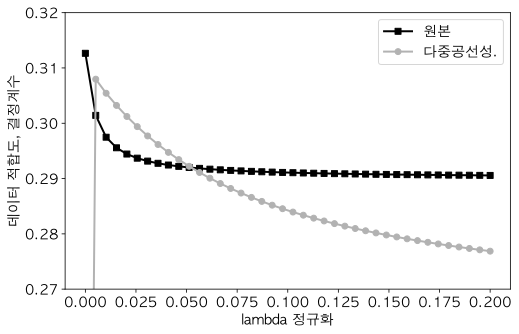

In [35]:
# range of gamma parameters
gs = np.linspace(0,.2,40)

# initialize r2 vector
r2s  = np.zeros(gs.shape)
r2sM = np.zeros(gs.shape) # the 'M' is for 다중공선성


# loop over gammas
for i in range(len(gs)):

  # create lambda
  l = gs[i]*np.linalg.norm(desmat,'fro')**2

  # compute left-inverse
  leftinv = np.linalg.inv(desmat.T@desmat + l*np.eye(desmat.shape[1])) @ desmat.T
  
  # compute beta and predicted data
  b = leftinv @ y
  yHat = desmat@b

  # model fit to data
  r2s[i] = np.corrcoef(y.T,yHat.T)[0,1]**2


  ### repeat for the multicollinear model (condensed for convenience)
  l       = gs[i]*np.linalg.norm(desmatM,'fro')**2
  leftinv = np.linalg.inv(desmatM.T@desmatM + l*np.eye(desmatM.shape[1])) @ desmatM.T
  b       = leftinv @ y
  yHat    = desmatM@b
  r2sM[i] = np.corrcoef(y.T,yHat.T)[0,1]**2



# plot the results
plt.figure(figsize=(8,5))
plt.plot(gs,r2s,'ks-',linewidth=2,label='원본')
plt.plot(gs,r2sM,'o-',linewidth=2,label='다중공선성.',color=[.7,.7,.7])
plt.xlabel('lambda 정규화')
plt.ylabel('데이터 적합도, 결정계수')
plt.ylim([.27,.32])
plt.legend()
plt.show()

11 - 5

/Users/marklee/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3526: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


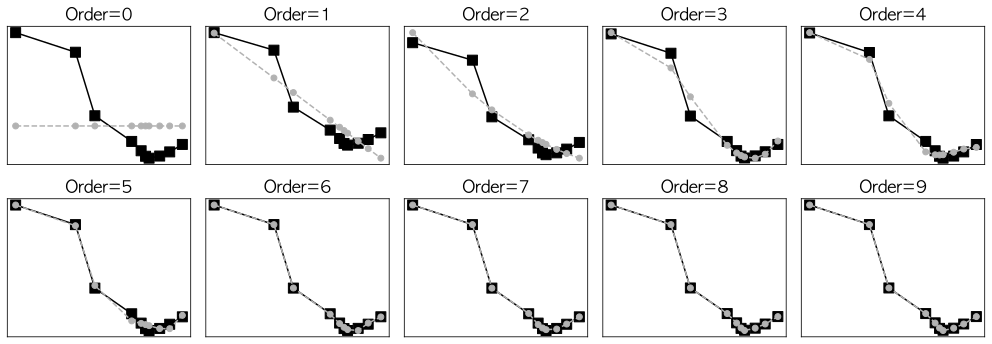

In [38]:
year       = [1534, 1737, 1803, 1928, 1960, 1975, 1987, 2023, 2057, 2100 ]
doubleTime = [ 697,  594,  260,  125,   76,   47,   37,   48,   70,  109 ]

N = len(year)


_,axs = plt.subplots(2,5,figsize=(14,5))
axs = axs.flatten()


for oi in range(N):
  beta = np.polyfit(year,doubleTime,oi)
  yHat = np.polyval(beta,year)


  axs[oi].plot(year,doubleTime,'ks-',markersize=10)
  axs[oi].plot(year,yHat,'o--',color=[.7,.7,.7])
  axs[oi].set(xticks=[], yticks=[])
  axs[oi].set_title('Order=%g' %oi)

plt.tight_layout()
plt.show()